In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what coloumn category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:
1. Who were the passengers on the Titanic? (Ages, Gender, Class,...etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5. What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

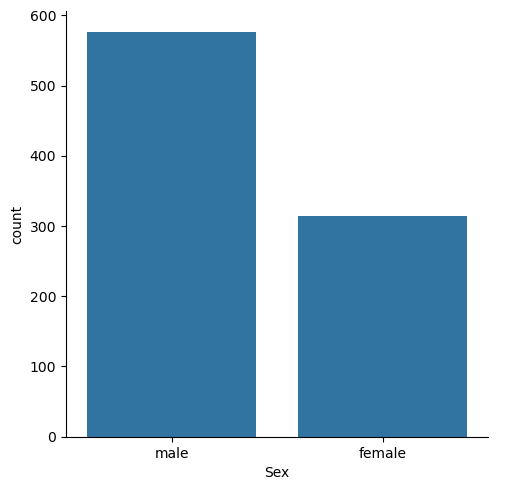

In [6]:
sns.catplot(x='Sex',data=titanic_df,kind='count')
#factorplot changed to catplot.

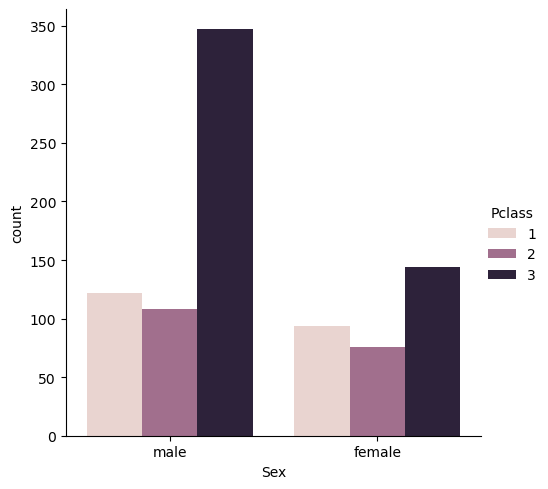

In [6]:
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')

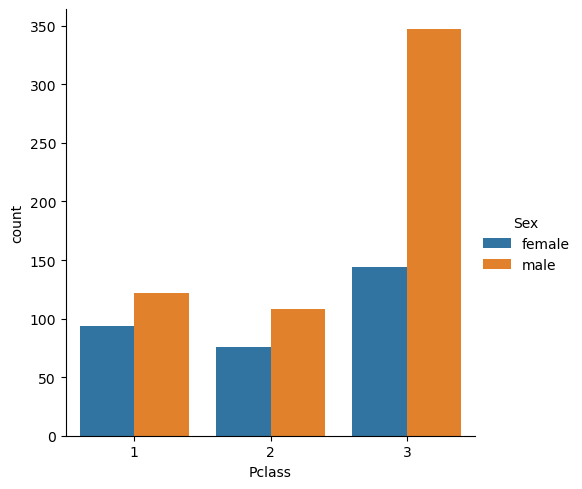

In [7]:
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

In [12]:
#include male, female, child as function, and passager as an object
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [13]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis =1)
# create the new column dataframe >titanic_df['person']

In [14]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


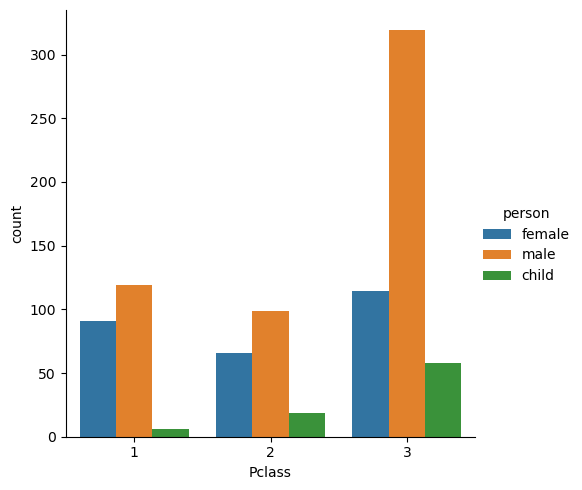

In [15]:
sns.catplot(x='Pclass',data=titanic_df,hue='person',kind='count')

<Axes: >

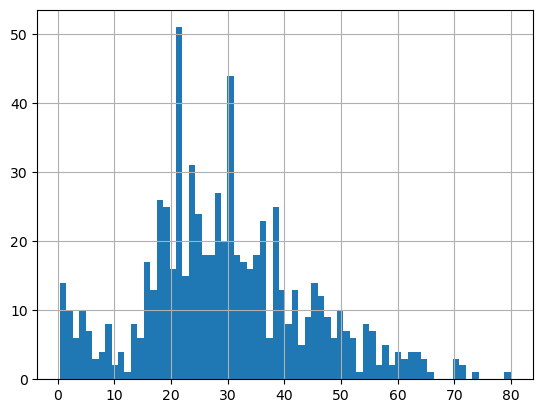

In [16]:
titanic_df['Age'].hist(bins=70)

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [19]:
titanic_df['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


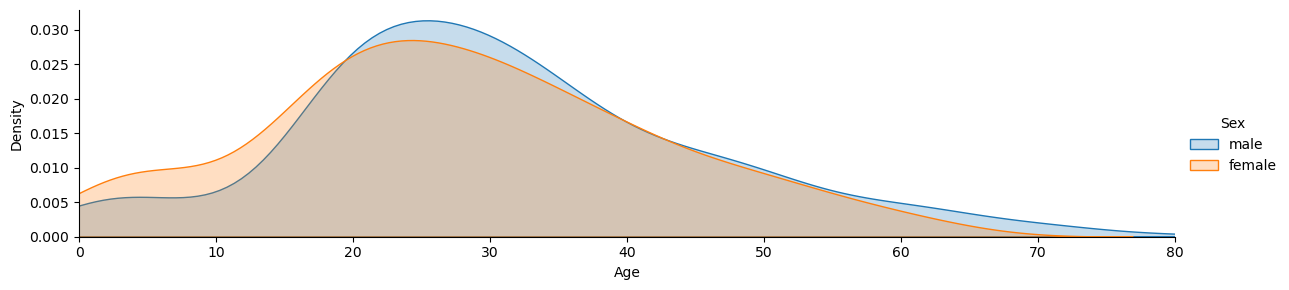

In [20]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, 
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect =4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age', shade =True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


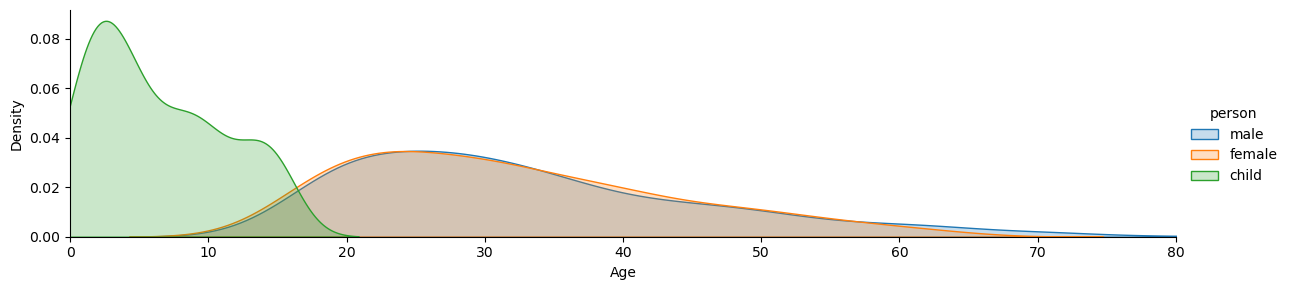

In [17]:
# We could have done the same thing for the 'person' column to include children:

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/bellz_um/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


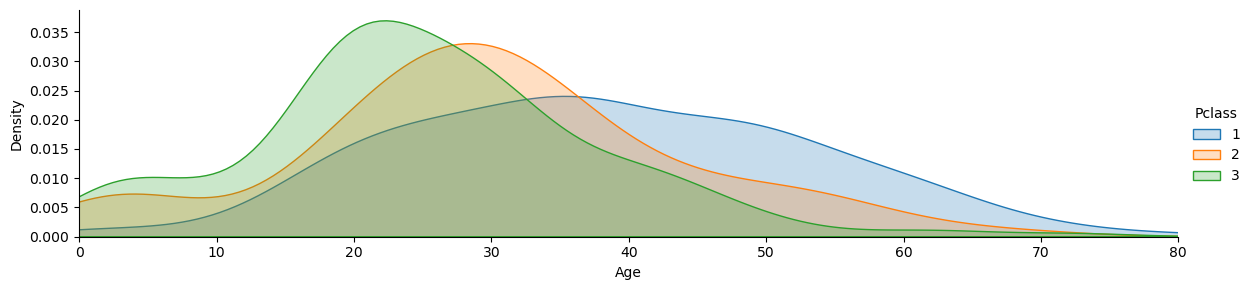

In [21]:
# # Let's do the same for class by changing the hue argument:

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

In [22]:
# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_82991/2619769630.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d', order=order)


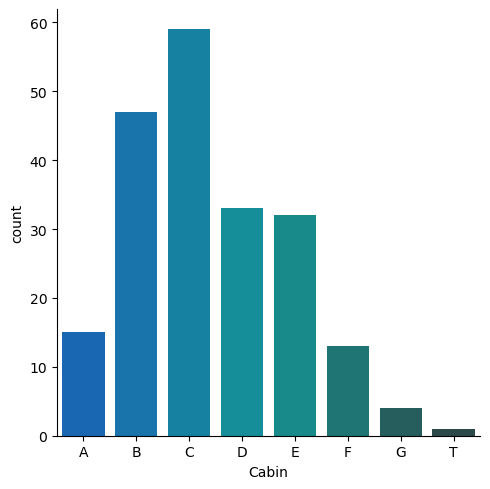

In [25]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot   
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

# Define the order from 'A' to 'Z'
order = sorted(cabin_df['Cabin'].unique())

sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d', order=order)

/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_82991/1400331207.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df,  kind='count', palette ='summer', order = order)


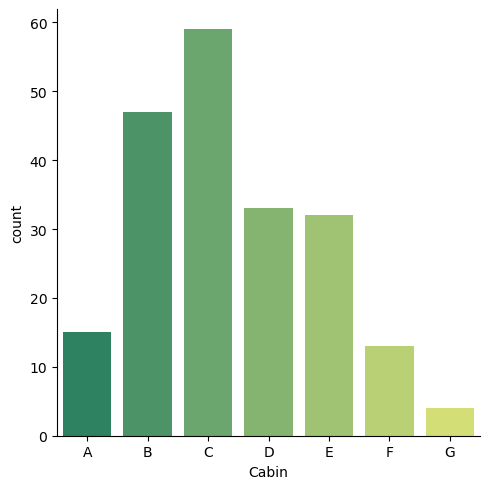

In [26]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
# Define the order from 'A' to 'Z' again after removing 'T'
# Cannot use the same order because it will use the previous order that includes 'T'
order = sorted(cabin_df['Cabin'].unique())
#replot
sns.catplot(x='Cabin', data=cabin_df,  kind='count', palette ='summer', order = order)

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


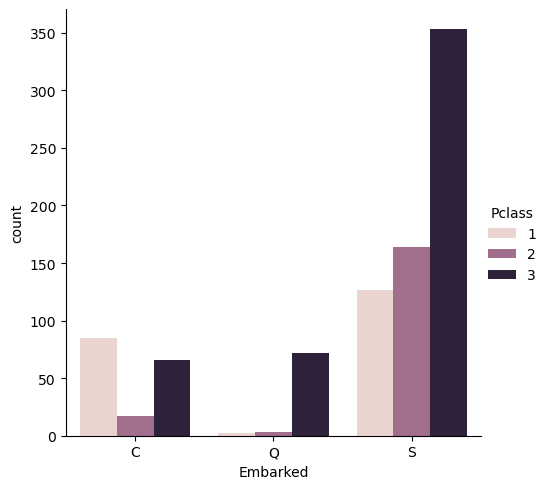

In [28]:
# Make sure 'Embarked' column contains only strings
titanic_df['Embarked'] = titanic_df['Embarked'].astype(str)

# Use catplot with the correct parameter name 'order'
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])


In [29]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

4.) Who was alone and who was with family?

In [30]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone']=titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [31]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_82991/2035257149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_82991/2035257149.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_68882/4269736826.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Alone', data=titanic_df,  kind='count', palette = 'Blues')


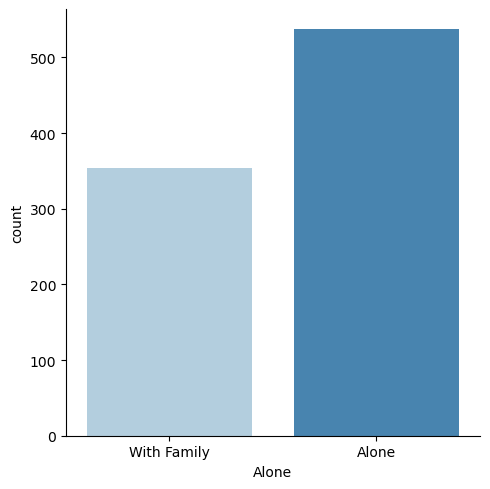

In [32]:
sns.catplot(x='Alone', data=titanic_df,  kind='count', palette = 'Blues')

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?


In [33]:
titanic_df['Survivor']= titanic_df.Survived.map({0:'no',1:'yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_82991/2760528300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survivor', data=titanic_df,  kind='count', palette = 'Greens')


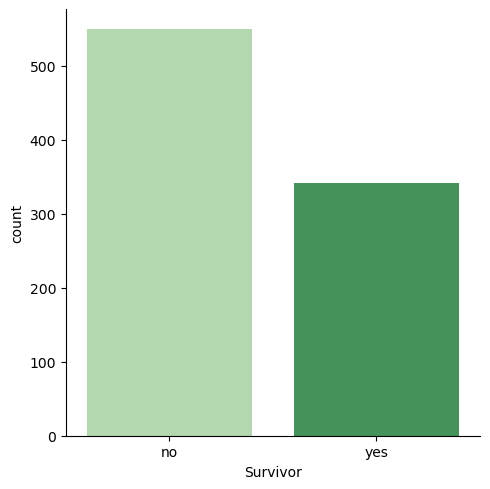

In [34]:
sns.catplot(x='Survivor', data=titanic_df,  kind='count', palette = 'Greens')

<Axes: xlabel='Pclass', ylabel='Survived'>

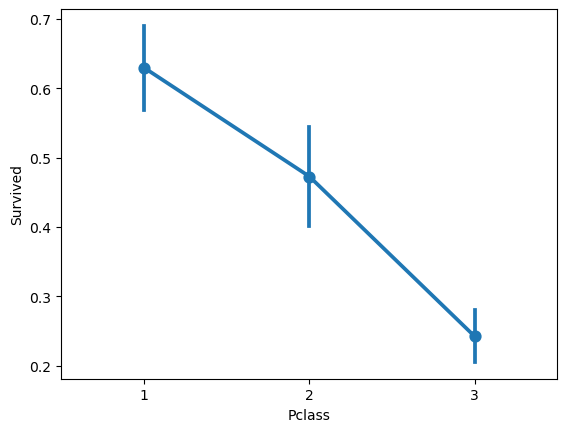

In [35]:
sns.pointplot(y='Survived', x='Pclass', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

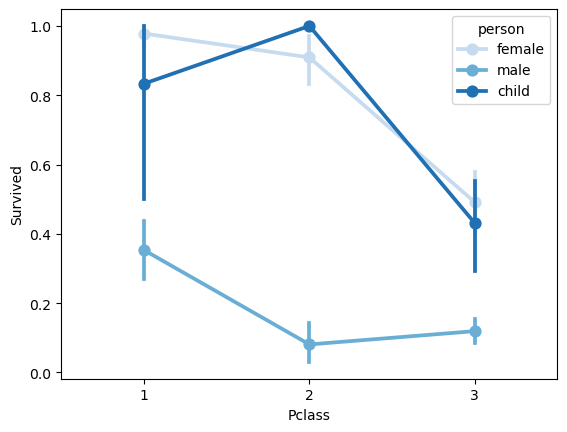

In [36]:
sns.pointplot(y='Survived', x='Pclass', hue='person', data=titanic_df, palette='Blues', linestyles='-')

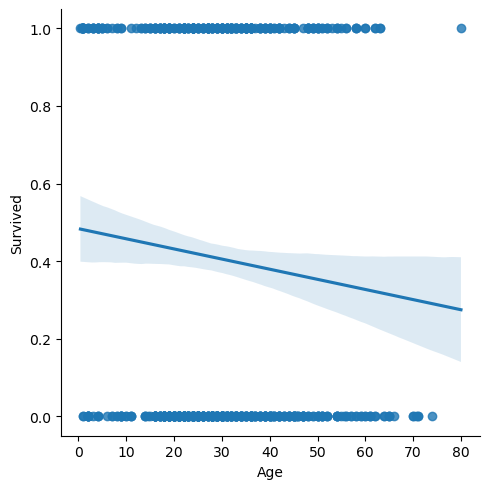

In [37]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived', data=titanic_df)

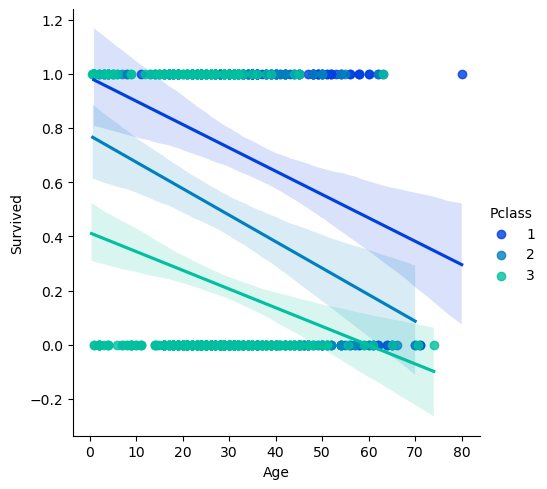

In [38]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived', hue = 'Pclass', data=titanic_df, palette ='winter')

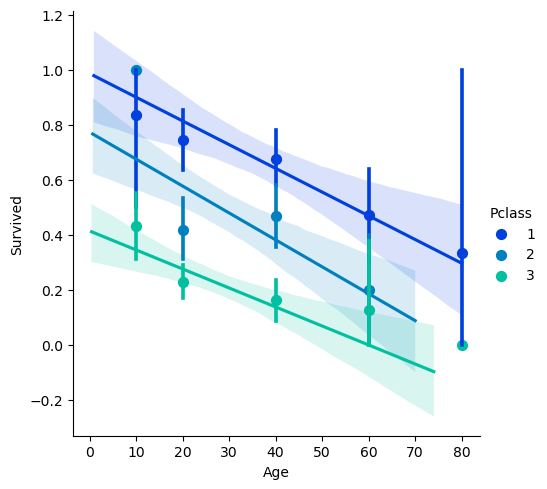

In [39]:
# Let's use a linear plot on age versus survival using hue for class seperation

generations = [10,20,40,60,80]
sns.lmplot(x='Age',y='Survived', hue = 'Pclass', data=titanic_df, palette ='winter', x_bins =generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

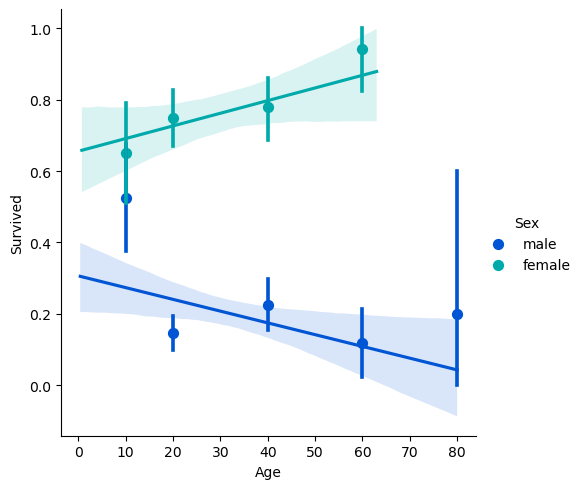

In [40]:
sns.lmplot(x='Age',y='Survived', hue = 'Sex', data=titanic_df, palette ='winter', x_bins =generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2. Did having a family member increase the odds of surviving the crash?

In [41]:
titanic_df['Deck'] = titanic_df['Cabin'].str[0]

In [42]:
deck_survival_rate = titanic_df.groupby('Deck')['Survived'].mean()
deck_survival_rate 

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_68882/1169010718.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deck_survival_rate.index, y=deck_survival_rate.values, palette='viridis')


<Axes: xlabel='Deck'>

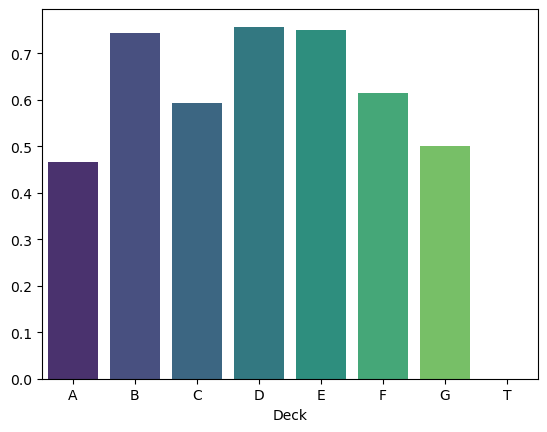

In [55]:
sns.barplot(x=deck_survival_rate.index, y=deck_survival_rate.values, palette='viridis')

Effect of Family Members on Survival Rate

In [44]:
# Calculate survival rates for passengers with and without family members
family_survival_rate = titanic_df.groupby('Alone')['Survived'].mean()
family_survival_rate 

Alone
Alone          0.303538
With Family    0.505650
Name: Survived, dtype: float64

/var/folders/9m/6k5pljh53jlfxxl1gkktfjc80000gn/T/ipykernel_82991/3068947208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_survival_rate.index, y=family_survival_rate.values, palette='viridis')


<Axes: xlabel='Alone'>

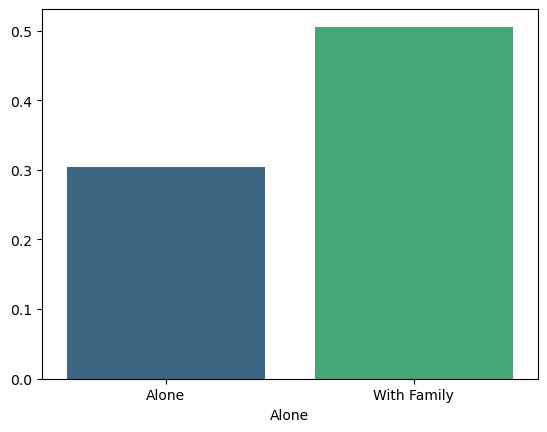

In [45]:
sns.barplot(x=family_survival_rate.index, y=family_survival_rate.values, palette='viridis')

In [ ]:
########################Data science########################

<h1>Import libraries</h1


In [328]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

<h1>Read data</h1>

In [329]:
#loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('gender_submission.csv')

In [330]:
print("Training set shape: ",train.shape)
print("Test set shape: ",test.shape)


Training set shape:  (891, 12)
Test set shape:  (418, 11)


Note that the test set has one column less than training set, the Survived column. This is because Survived is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict the survival of the passengers in the test set.

In [331]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [332]:
ss.shape

(418, 2)

So, our final dataframe that is to be submitted should look something like this, 418 rows and 2 columns, one for PassengerId and one for Survived.

<h1> Data description </h1>
Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

Survived: 0 = Did not survive, 1 = Survived

Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

Sex: Male or female

Age: Age in years, fractional if less than 1

SibSp: Number of siblings or spouses aboard the titanic

Parch: Number of parents or children aboard the titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

 <h2>Exploratory Data Analysis (EDA)</h2>
Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [333]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [334]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [335]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Seems like Age, Cabin and Embarked colummns in the training set have missing data while Age, Fare and Cabin in the test set have missing data. Another way to to diagnose this is via the missingno library.

<Axes: >

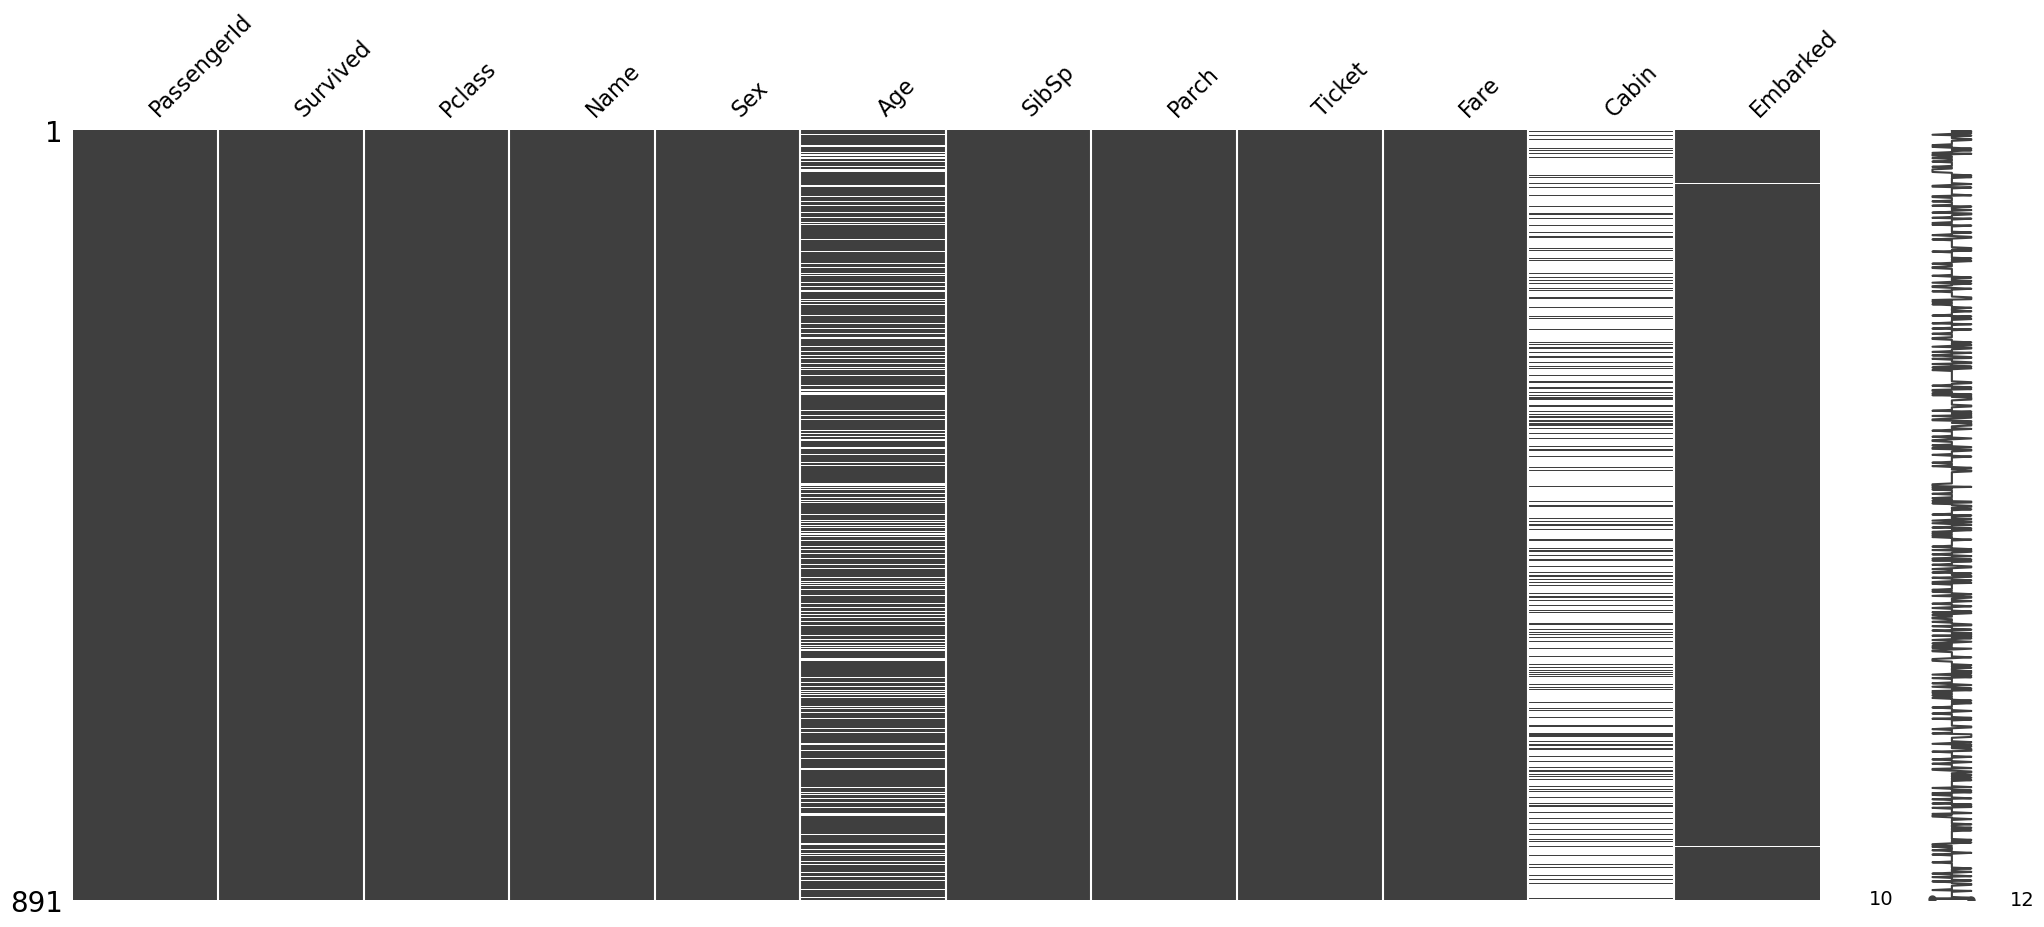

In [336]:
# Missing data in training set
missingno.matrix(train)

<Axes: >

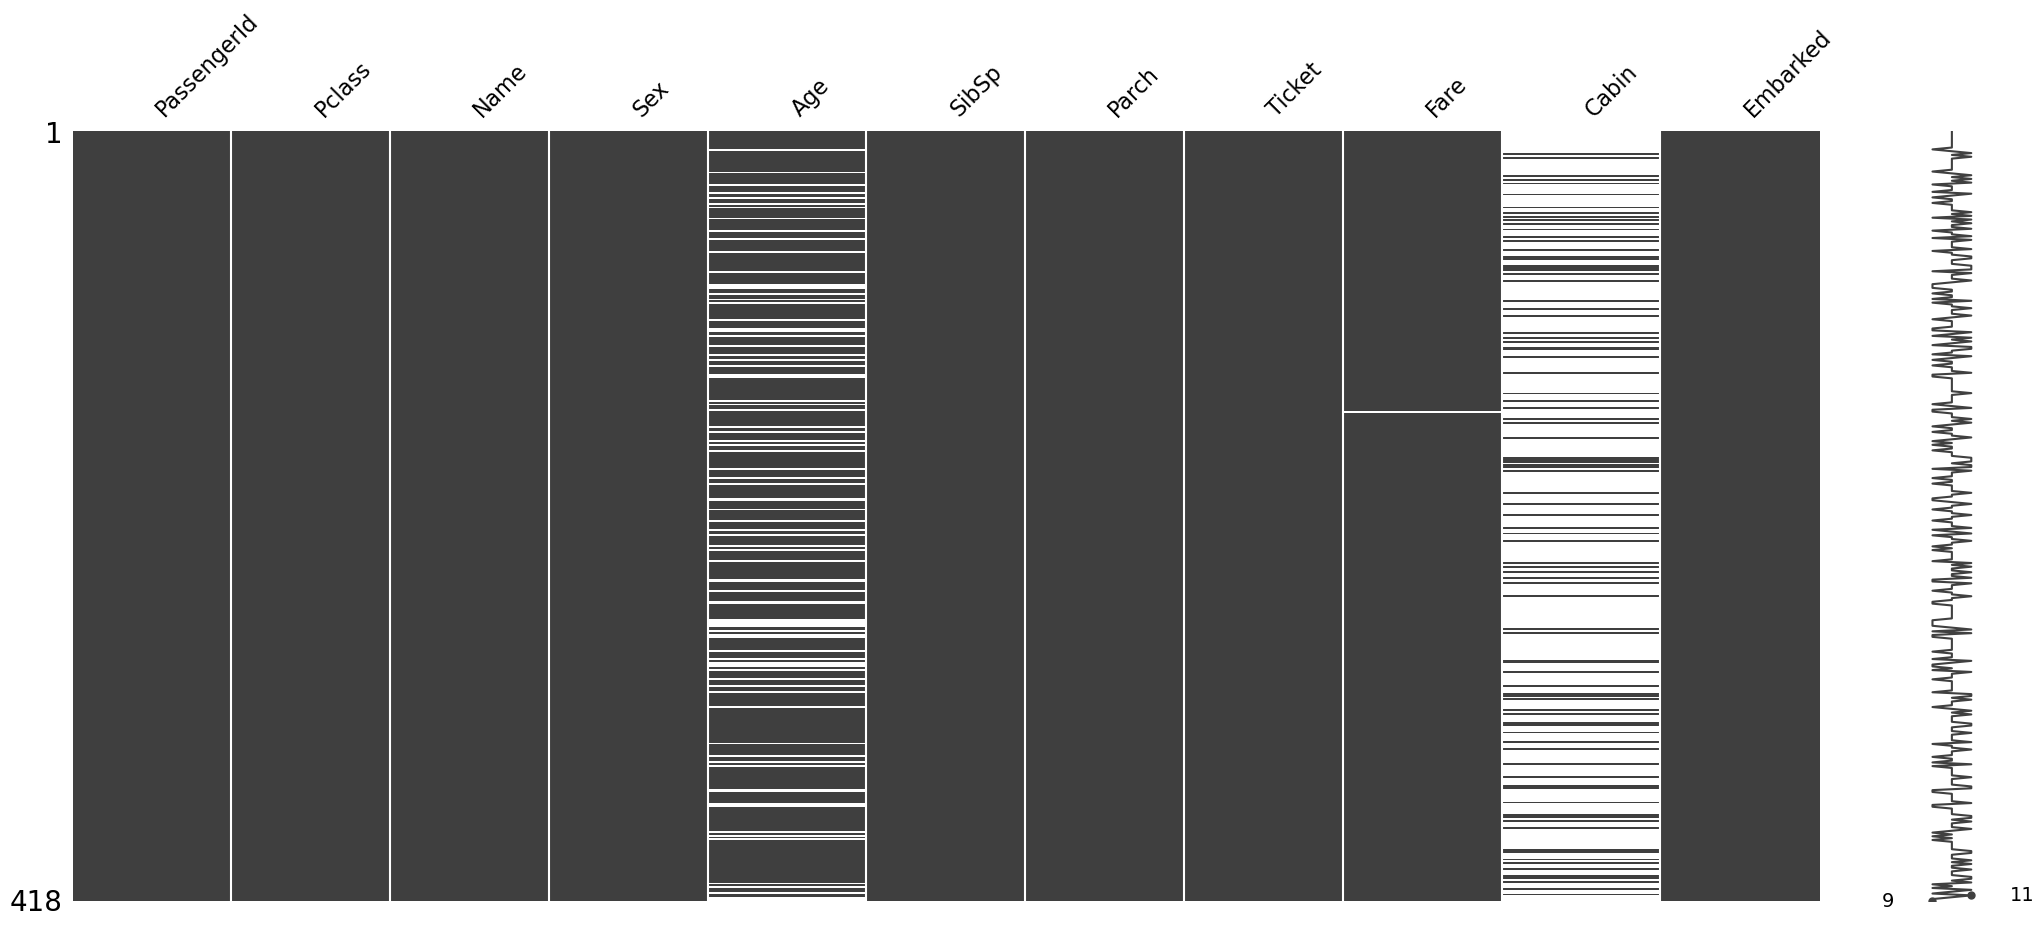

In [337]:
# Missing data in test set
missingno.matrix(test)

In [338]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [339]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200



<h2>Feature analysis</h2>
A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

Before we move on, it is also important to note the difference between a categorical variable and a numerical variable. Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic ordering to these categories. An example of this in our data is the Sex feature. Every passenger is distinctly classified as either male or female. Numerical variables, on the other hand, have a continuous distribution. Some examples of numerical variables are the Age and Fare features.

Knowing if a feature is a numerical variable or categorical variable helps us structure our analysis more properly. For instance, it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

In this next section of the notebook, we will analyse the features in our dataset individually and see how they correlate with survival probability.

<h3>Categorical variables</h3>
Categorical variables in our dataset are Sex, Pclass and Embarked.

In [340]:
#Value counts of the sex column
train['Sex'].value_counts(dropna = False) # count null value due to dropna =False
# Comment: There are more male passengers than female passengers on titanic

Sex
male      577
female    314
Name: count, dtype: int64

In [341]:
# Mean of survival by sex
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)
# as_index=False parameter ensures that Sex remains a column in the resulting DataFrame rather than becoming the index.

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

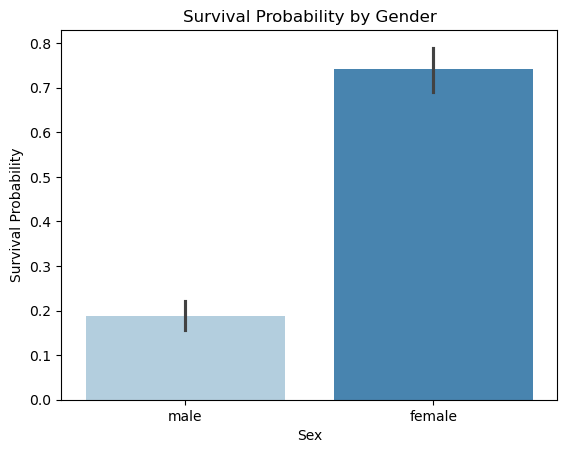

In [342]:
sns.barplot(x = 'Sex', y ='Survived', data = train, palette = 'Blues')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

<h3>Categorical variable: Pclass</h3>

In [343]:
# Value counts of the Pclass column 
train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [344]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

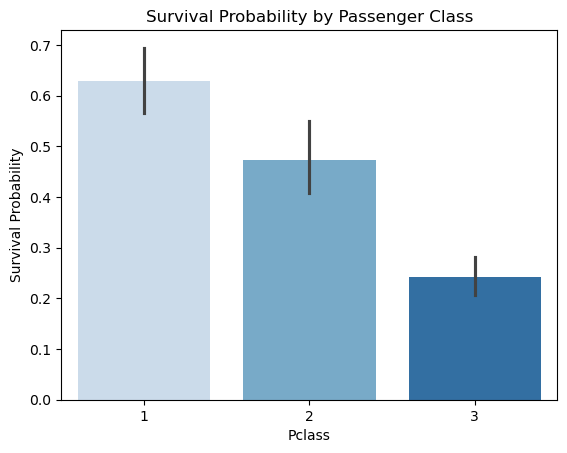

In [345]:
sns.barplot(x = 'Pclass', y ='Survived', data = train, palette = 'Blues')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

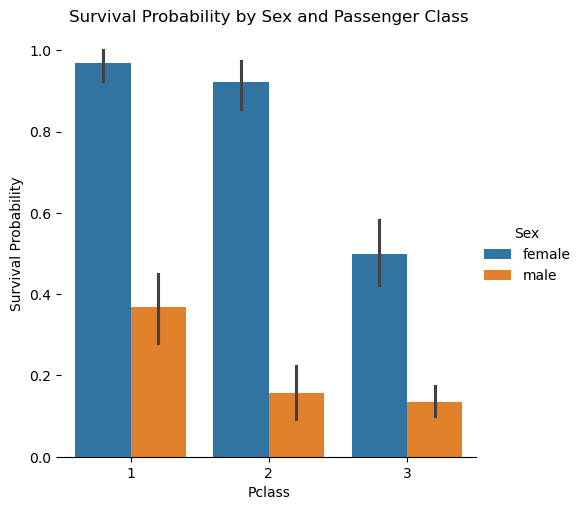

In [346]:
# Survival by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

<h3>Categorical variable: Embarked</h3>


In [347]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [348]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

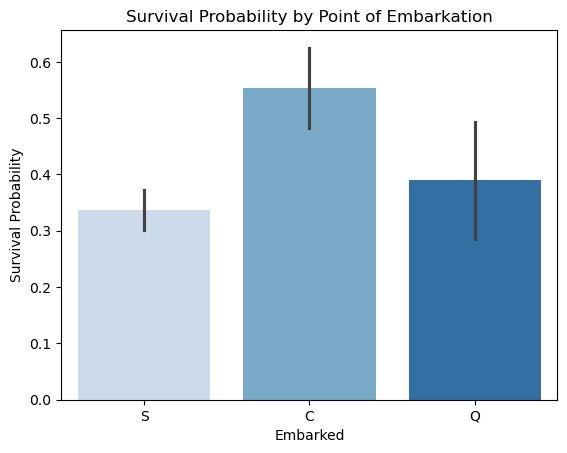

In [349]:
sns.barplot(x = 'Embarked', y ='Survived', data = train, palette = 'Blues')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

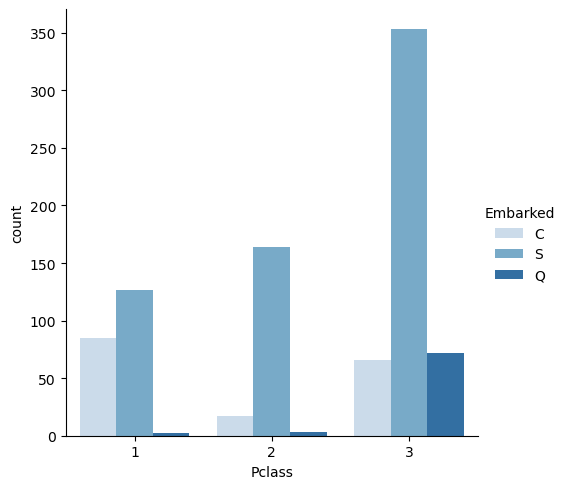

In [350]:
sns.catplot(x='Pclass', hue = 'Embarked', data = train, kind = 'count',palette = 'Blues')

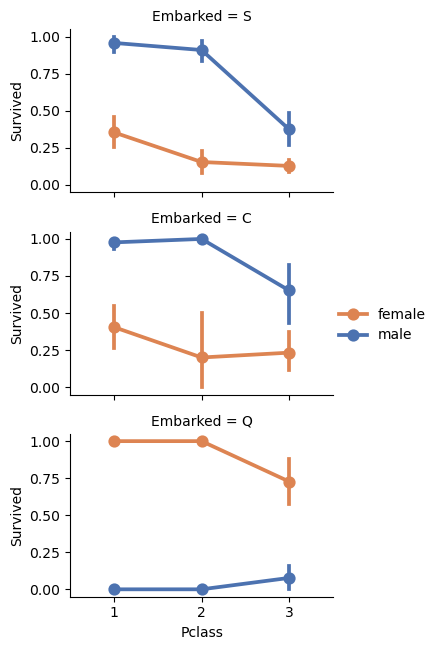

In [351]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

<h3>Numerical variables</h3>
Numerical variables in our dataset are SibSp, Parch, Age and Fare.

<h3>Detect and remove outliers in numerical variables</h3>
Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [352]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)
# 2: The threshold number of features. This means that an index will be considered an outlier if it appears as an outlier in more than 2 of the specified features.


We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


<h4>Detailed Example</h4>
Assuming train is your DataFrame, and you have the following data:

Index	Age	SibSp	Parch	Fare
0	22	1	0	7.25
1	38	1	0	71.28
2	26	0	0	7.92
3	35	1	0	53.10
4	35	1	0	8.05
...	...	...	...	...
When you call detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare']), the function will:

Identify outliers in each of the specified features.
Collect the indices of these outliers.
Determine which indices appear as outliers in more than 2 features.
Return those indices.
Let's say the function finds the following:

Age outliers: [10, 20, 30]
SibSp outliers: [20, 30, 40]
Parch outliers: [30, 40, 50]
Fare outliers: [10, 20, 30]
Then, the outlier indices would be:

Index 10: appears in Age and Fare (2 features)
Index 20: appears in Age, SibSp, and Fare (3 features)
Index 30: appears in Age, SibSp, Parch, and Fare (4 features)
Index 40: appears in SibSp and Parch (2 features)
Since we're looking for indices that appear in more than 2 features (based on the threshold value of 2), the function would return [20, 30].

The printed output would be:

less
Copy code
We will drop these 2 indices: [20, 30]
Conclusion
The code snippet identifies and prints out the indices of the rows that are considered outliers based on multiple features. These indices are determined by checking if they appear as outliers in more than 2 of the specified features ('Age', 'SibSp', 'Parch', 'Fare'). This helps in cleaning the data by removing rows that are significantly different from the rest of the data.

In [353]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [354]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<h3>Numerical variables correlation with survival</h3>

<Axes: >

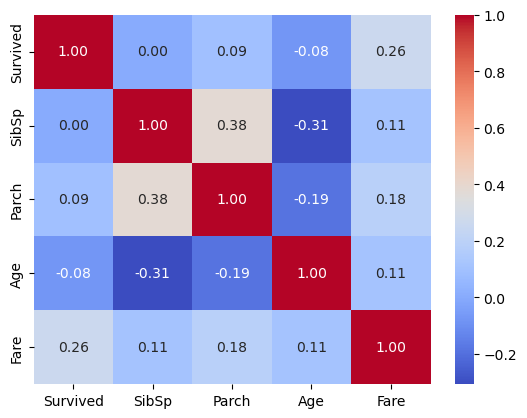

In [355]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot = True, fmt = '.2f', cmap = 'coolwarm')
# Comment: Fare seems to be the only feature that has a substantial correlation with survival
#train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']]:
##This selects a subset of the DataFrame train containing only the columns 'Survived', 'SibSp', 'Parch', 'Age', and 'Fare'.

#.corr():
##This method calculates the correlation matrix for the selected columns. The correlation matrix is a table showing the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. Correlation coefficients range from -1 to +1. A value close to +1 means a strong positive correlation, a value close to -1 means a strong negative correlation, and a value close to 0 means no correlation.

#sns.heatmap(..., annot = True, fmt = '.2f', cmap = 'coolwarm'):

#sns.heatmap(...): This function from the Seaborn library creates a heatmap.
##annot = True: This argument adds the correlation coefficient values to each cell in the heatmap.
##fmt = '.2f': This argument formats the annotation text to display two decimal places.
##cmap = 'coolwarm': This argument sets the colormap of the heatmap to 'coolwarm', which provides a color gradient from cool colors (blue) to warm colors (red).


Feature 'Fare' appears to have a substantial correlation with the 'Survived' feature based on the heatmap. This means that the correlation coefficient between 'Fare' and 'Survived' is relatively <b>high</b> compared to other features, suggesting a stronger relationship between these two variables.

<h3>Numerical Variable: SibSp</h3>

In [356]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [357]:
# Mean of survival by SibSp
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

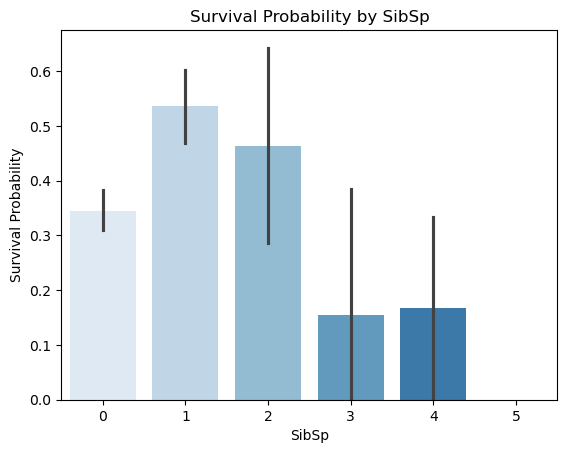

In [358]:
sns.barplot(x = 'SibSp', y ='Survived', data = train, palette = 'Blues')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

<h3>Numerical Variable: Parch</h3>

In [359]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [360]:
# Mean of survival by Parch
train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

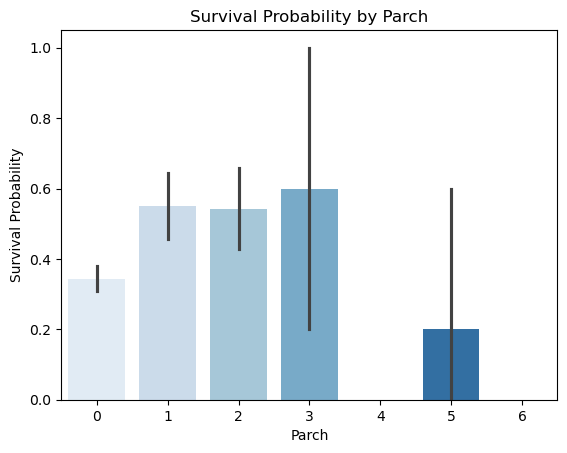

In [361]:
sns.barplot(x = 'Parch', y ='Survived', data = train, palette = 'Blues')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

<h3>Numerical Variable: Age</h3>

In [362]:
# Null counts of the Age column 
# Too many null values, so we should not use count function.

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

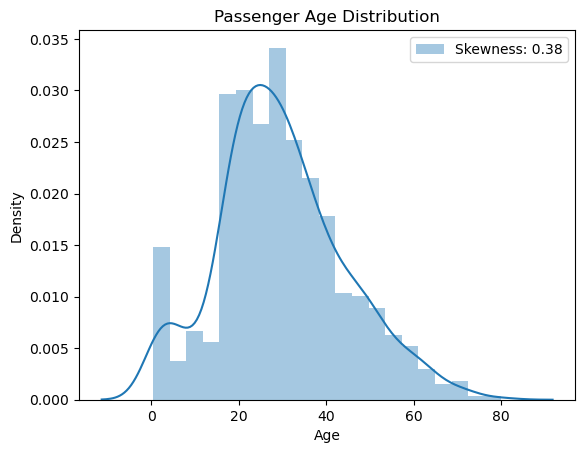

In [363]:
# Passenger age distribution
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')
#train['Age'].skew(): This calculates the skewness of the 'Age' column. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. A skewness value close to 0 indicates a symmetric distribution, a positive skew indicates a distribution with a long right tail, and a negative skew indicates a distribution with a long left tail.
#'Skewness: %.2f' % ...: This formats the skewness value to two decimal places and inserts it into the string.

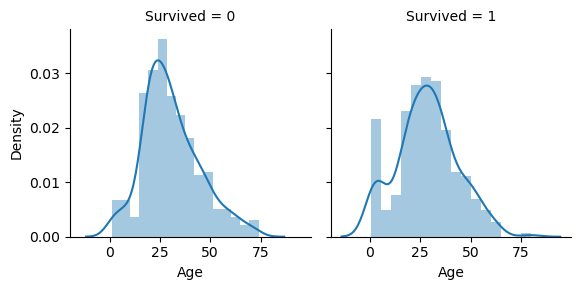

In [364]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

#col = 'Survived': This specifies that the data should be separated into different columns based on the unique values in the 'Survived' column. This means you'll get a grid with a separate plot for each unique value of 'Survived'.


Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

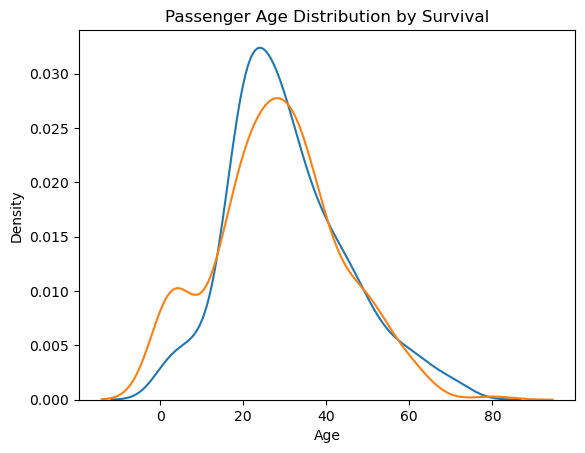

In [365]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

<h3>Numerical Variable: Fare</h3>

In [366]:
# Null counts of the fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

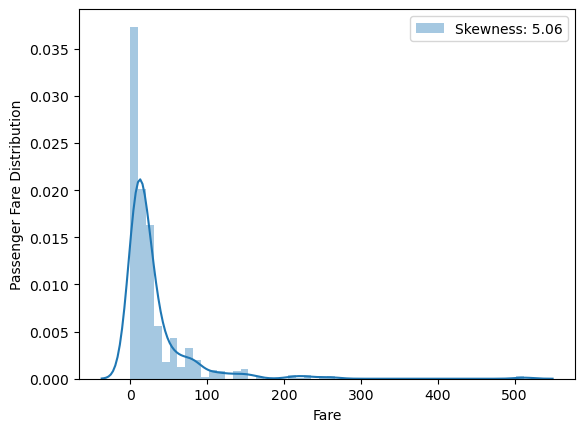

In [367]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Fare seems to have a high skewness. We will address this issue later on in the notebook via log transformation.

<h1>Data preprocessing</h1>
Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

<h2> Drop and fill missing values</h2>

In [368]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [369]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [370]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [371]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [372]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [373]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [374]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [375]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [376]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [377]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

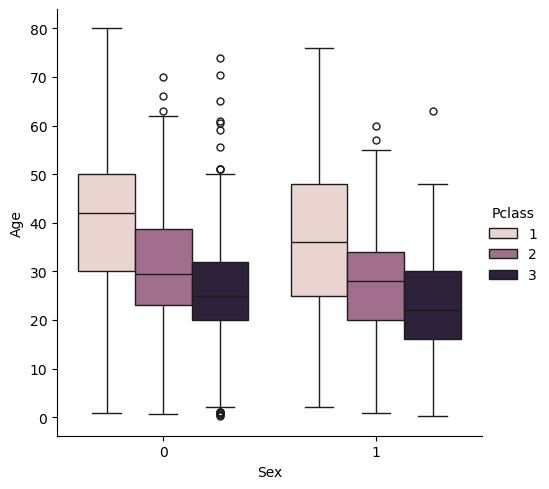

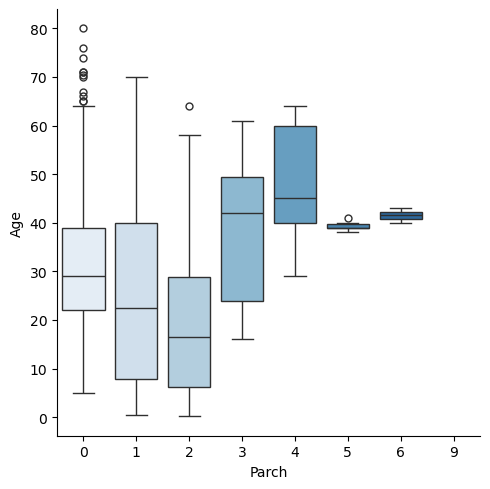

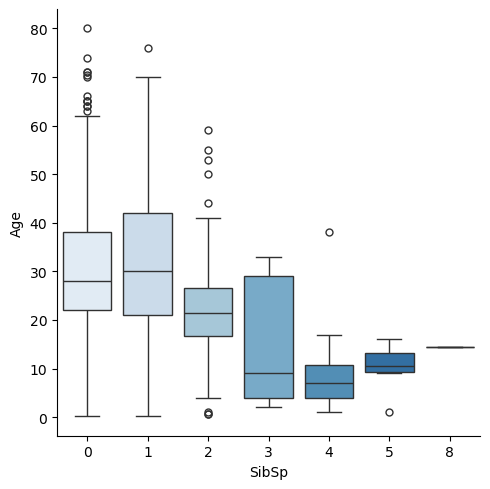

In [378]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = combine, palette = 'Blues' )
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine, palette = 'Blues')

<Axes: >

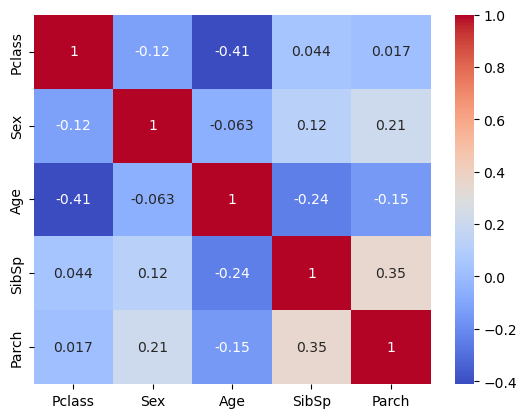

In [379]:
# Drop non-numeric columns
numeric_df = combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis=1)

# Ensure that the DataFrame contains only numeric columns
numeric_df = numeric_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass.

In [380]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [381]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [382]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

<h2> Data transformation</h2>
Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

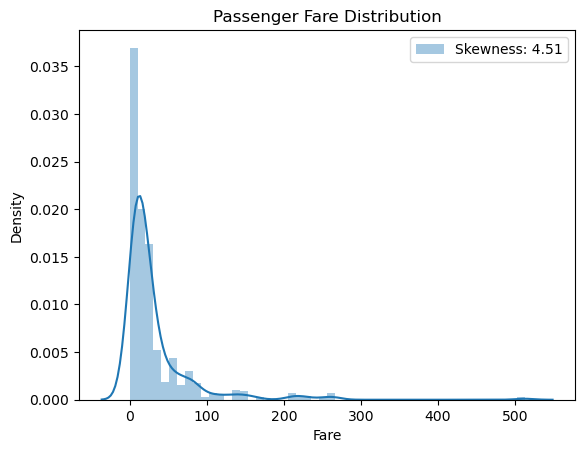

In [383]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

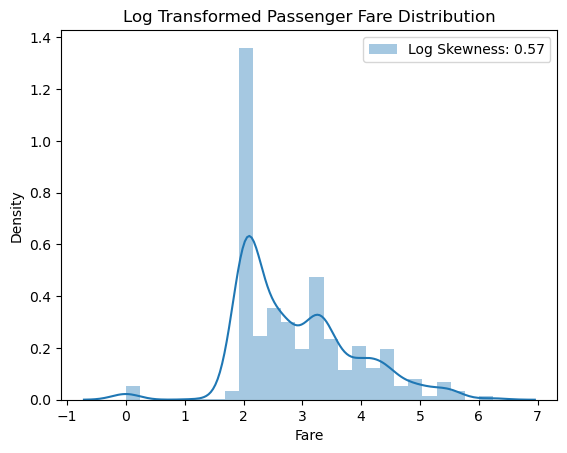

In [384]:
# Log Transformation
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
sns.distplot(combine['Fare'], label='Log Skewness: %.2f' % (combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Log Transformed Passenger Fare Distribution')
plt.show()


<h3>Feature engineering</h3>
Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:

- Title
- IsAlone
- Age*Class

<h3>Title</h3>

In [385]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [386]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [387]:
# Value counts of Title

combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [388]:
# Number of unique Title

combine['Title'].nunique()

18

In [389]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<Axes: xlabel='Title', ylabel='count'>

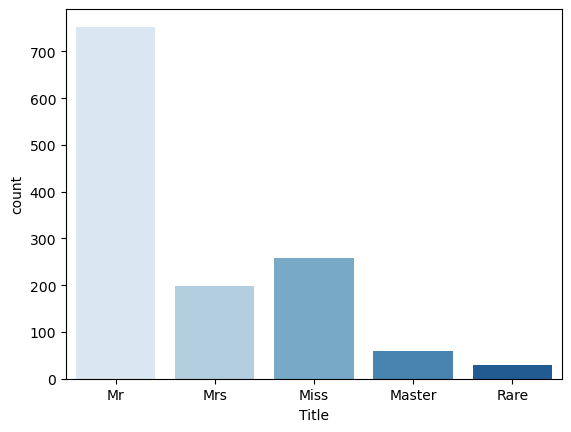

In [390]:

sns.countplot(x = 'Title', data = combine, palette = 'Blues')

In [391]:

# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

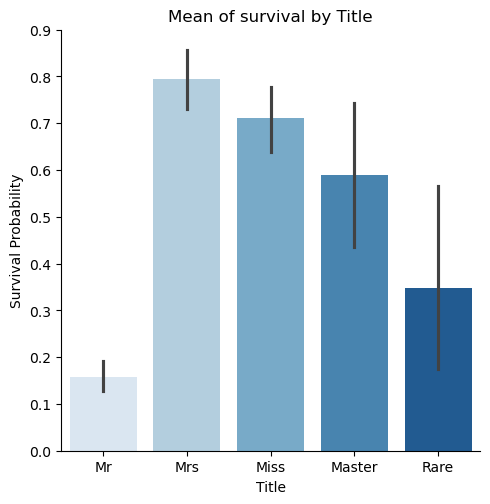

In [392]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar',palette = 'Blues')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [393]:
# Drop name column
combine = combine.drop('Name', axis =1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


<h3>IsAlone</h3>

In [394]:
# Calculate family size from SibSp and Parch
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] +1
combine[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [395]:

combine[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [396]:
# Create IsAlone feature
#initialize 
combine['IsAlone'] = 0
#Set IsAlone based on FamilySize
combine.loc[combine['FamilySize']==1, 'IsAlone'] = 1

#Therefore, when FamilySize is 1, the passenger is alone, which justifies setting IsAlone to 1. This feature helps distinguish between passengers traveling alone and those traveling with family, which can be an important factor in survival prediction models.

In [397]:
# Mean of survival by IsAlone
combine[['IsAlone','Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [398]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


<h3> Age*Class</h3>
To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values.

We will group Ages into 5 separate age bands and assign a number to each age band.

In [399]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index =False).mean().sort_values(by = 'Survived', ascending  = False)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.339662
4,"(64.034, 80.0]",0.090909


In [400]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [401]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [402]:
# Age and Pclass data Types
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [403]:
# Convert ordinal Age into integer
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [404]:
# Create Age*Class feature
combine['Age&Class'] = combine['Age']*combine['Pclass']
combine[['Age','Pclass','Age&Class']].head()

,Age,Pclass,Age&Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


<h3>Feature encoding</h3>
Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.


In [405]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age&Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [406]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

#The pd.get_dummies() function in pandas is used to convert categorical variables into a form that can be provided to machine learning algorithms to do a better job in prediction. This process is known as one-hot encoding.

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,4.266662,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,2.070022,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,3.972177,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,2.085672,1,6,False,False,True,False,False,False,False,True


In [408]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')


,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [409]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [410]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [411]:
combine = combine.drop('FareBand', axis = 1)

In [412]:

combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [413]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [414]:

train.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [415]:

# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1.0,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1.0,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1.0,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0.0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [416]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,1,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,1,6,False,False,True,False,False,False,False,True


In [417]:

test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,NaN,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,NaN,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,NaN,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,NaN,3,1,1,1,0,3,False,False,False,True,False,False,False,True


In [418]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age&Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,False,False,True,False,False,False,True,False
882,893,3,1,2,1,0,6,False,False,False,True,False,False,False,True
883,894,2,0,3,1,1,6,False,False,True,False,False,False,True,False
884,895,3,0,1,1,1,3,False,False,True,False,False,False,False,True
885,896,3,1,1,1,0,3,False,False,False,True,False,False,False,True


<h1>Modelling</h1>
Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost
In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

<h2>Split training data</h2>

We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [419]:
X_train = train.drop('Survived', axis =1 )
Y_train = train['Survived']
X_test = test.drop('PassengerId',axis =1).copy()
#PassengerId: Dropped because it doesn't provide predictive information and is not a feature.
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


<h3>Fit model to data and make predictions</h3>
This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set.

<h3>Logistic Regression</h3>

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
# *100 : turn to percentage, 2 : decimals
acc_log

<h3>Support vector machines</h3>

In [422]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.09

<h3>K-nearest neighbours(KNN)</h3>

In [423]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

<h3>Gaussian naive bayes</h3>

In [424]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

<h3>Perceptron</h3>

In [425]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

<h3>Linear SVC</h3>

In [426]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

<h3>Stochastic gradient descent</h3>

In [427]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.25

<h3>Decision tree</h3>

In [428]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

<h3> Random forest</h3>

In [429]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

<h3>CatBoost</h3>

In [430]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)
acc_catboost

Learning rate set to 0.00976
0:	learn: 0.6868139	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.6798486	total: 63.9ms	remaining: 31.9s
2:	learn: 0.6729519	total: 64.6ms	remaining: 21.5s
3:	learn: 0.6669732	total: 65.1ms	remaining: 16.2s
4:	learn: 0.6607853	total: 65.7ms	remaining: 13.1s
5:	learn: 0.6554567	total: 66.3ms	remaining: 11s
6:	learn: 0.6500730	total: 66.9ms	remaining: 9.49s
7:	learn: 0.6437986	total: 67.7ms	remaining: 8.39s
8:	learn: 0.6398271	total: 68.2ms	remaining: 7.5s
9:	learn: 0.6351628	total: 68.7ms	remaining: 6.8s
10:	learn: 0.6305969	total: 69.2ms	remaining: 6.22s
11:	learn: 0.6252275	total: 69.8ms	remaining: 5.75s
12:	learn: 0.6203168	total: 70.5ms	remaining: 5.35s
13:	learn: 0.6163246	total: 71.1ms	remaining: 5.01s
14:	learn: 0.6126754	total: 71.5ms	remaining: 4.7s
15:	learn: 0.6078512	total: 72.1ms	remaining: 4.43s
16:	learn: 0.6033552	total: 72.8ms	remaining: 4.21s
17:	learn: 0.5984435	total: 73.5ms	remaining: 4.01s
18:	learn: 0.5935191	total: 74ms	remaining: 3.82s


85.7

In [436]:
# creatign a dictionary of the results
results = {'Model': ['Logistic regression',
'Support vector machines',
'K-nearest neighbours',
'Gaussian naive bayes',
'Perceptron',
'Linear SVC',
'Stochastic gradient descent',
'Decision tree',
'Random forest',
'CatBoost'],
'Score':[acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron,acc_linear_svc, acc_sgd,acc_decision_tree, acc_random_forest, acc_catboost]}

In [438]:
results_df = pd.DataFrame(results)
results_df.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Decision tree,85.70
1,Random forest,85.70
2,CatBoost,85.70
3,K-nearest neighbours,84.79
4,Support vector machines,83.09
5,Logistic regression,80.93
6,Linear SVC,80.25
7,Stochastic gradient descent,80.25
8,Perceptron,79.57
9,Gaussian naive bayes,79.11


<h3>K-fold cross validation</h3>
It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great video explaining the concept in more detail.

K-fold cross-validation is a robust method for evaluating the performance of machine learning models. It helps ensure that the evaluation is not dependent on the specific division of the dataset into training and testing sets. Here's a detailed explanation of how K-fold cross-validation works:

<b>Previous model method </b>

<b>Single Train-Test Split:</b>

<b>Characteristics:</b>
- Data Split: The dataset is split once into a training set and a testing set.
- Training: The model is trained on the training set.
- Testing: The model's performance is evaluated on the testing set.
Performance Estimate: Provides a single performance estimate based on the chosen train-test split.

<b>Advantages:</b>
Simplicity and speed: It's straightforward and computationally less expensive.
Suitable for very large datasets where multiple splits may be impractical.

<b>Disadvantages:</b>
Bias and Variance: The performance estimate may be biased and have high variance depending on how the data is split.

Data Utilization: Only part of the data is used for training and another part for testing, which might not fully utilize the available data.


<b>K-Fold Cross-Validation:</b>

<b>Characteristics:</b>
- Data Split: The dataset is split into K equally sized (or nearly equally sized) subsets, called folds.
- Training and Testing: The model is trained and tested K times, each time with a different fold as the test set and the remaining K-1 folds as the training set.
- Performance Estimate: Provides an average performance estimate across all folds.

<b>Advantages:</b>
- Reliable Performance Estimate: The average performance across K folds is less likely to be biased by the specific train-test split.
- Efficient Data Utilization: Every data point is used for both training and validation.
  
<b>Disadvantages:</b>
Computationally Expensive: Training and testing the model K times can be computationally intensive, especially for large datasets.

<b>Summary</b>
 <b>Single Train-Test Split:</b>
    - Simple and quick.
    - Performance estimate can be biased and have high variance.
    Utilizes only part of the data for training and testing.

<b> K-Fold Cross-Validation:</b>
    - More reliable and less biased performance estimate.
    - Efficiently uses all available data for training and testing.
    - Computationally more expensive due to multiple training and testing cycles.

Using K-fold cross-validation generally provides a more robust evaluation of the model's performance, especially when the dataset is not extremely large and the computational cost is manageable.

In [439]:
# create a list which contains classifiers
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
len(classifiers)

10

In [440]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 9.73ms	remaining: 9.72s
1:	learn: 0.6803104	total: 10.7ms	remaining: 5.33s
2:	learn: 0.6743325	total: 11.2ms	remaining: 3.73s
3:	learn: 0.6684758	total: 11.8ms	remaining: 2.93s
4:	learn: 0.6624558	total: 12.3ms	remaining: 2.45s
5:	learn: 0.6573316	total: 12.9ms	remaining: 2.14s
6:	learn: 0.6520750	total: 13.4ms	remaining: 1.91s
7:	learn: 0.6460855	total: 14.2ms	remaining: 1.76s
8:	learn: 0.6422712	total: 14.6ms	remaining: 1.61s
9:	learn: 0.6376842	total: 15.1ms	remaining: 1.5s
10:	learn: 0.6326540	total: 15.7ms	remaining: 1.41s
11:	learn: 0.6272334	total: 16.2ms	remaining: 1.34s
12:	learn: 0.6224744	total: 16.7ms	remaining: 1.27s
13:	learn: 0.6175197	total: 17.2ms	remaining: 1.21s
14:	learn: 0.6124415	total: 17.7ms	remaining: 1.16s
15:	learn: 0.6097890	total: 18.1ms	remaining: 1.11s
16:	learn: 0.6050559	total: 18.7ms	remaining: 1.08s
17:	learn: 0.6004948	total: 19.3ms	remaining: 1.05s
18:	learn: 0.5958640	total: 19.8ms	remaining:

In [441]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [462]:
# Assuming cv_mean and cv_std are defined and have the same length
cv_res = pd.DataFrame({
    'Cross Validation Mean': cv_mean,
    'Cross Validation Std': cv_std,
    'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']
})

# Sort the dataframe by Cross Validation Mean
cv_res = cv_res.sort_values(by='Cross Validation Mean', ascending=False, ignore_index=True)

# Extract the sorted means and standard deviations
cv_mean_sorted = cv_res['Cross Validation Mean'].values
cv_std_sorted = cv_res['Cross Validation Std'].values
algorithms_sorted = cv_res['Algorithm'].values


In [463]:

# Verify shapes
print("Shape of cv_mean_sorted:", cv_mean_sorted.shape)
print("Shape of cv_std_sorted:", cv_std_sorted.shape)
print("Shape of algorithms_sorted:", algorithms_sorted.shape)

Shape of cv_mean_sorted: (10,)
Shape of cv_std_sorted: (10,)
Shape of algorithms_sorted: (10,)


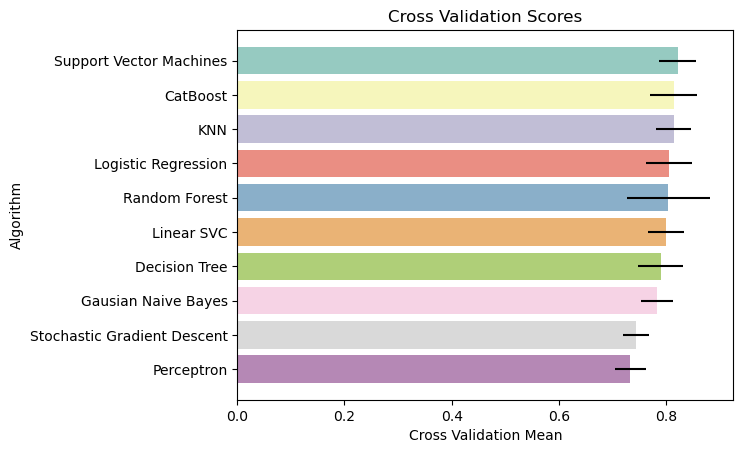

In [464]:
# Create the bar plot with seaborn
sns.barplot(
    x=cv_mean_sorted,
    y=algorithms_sorted,
    palette='Set3',
    ci=None  # Disable built-in confidence interval
)

# Add error bars manually
for i in range(len(cv_res)):
    plt.errorbar(
        x=cv_mean_sorted[i],
        y=i,  # The y position is the index of the bar
        xerr=cv_std_sorted[i],
        fmt='none',  # No line connecting the points
        ecolor='black'  # Error bar color
    )
#In this version:
#Seaborn's barplot is used to create the horizontal bar plot.
#Matplotlib's errorbar is used to add error bars manually to ensure they match the corresponding mean values.
#This should fix the issue with xerr not matching the x data in length and provide a clear visualization of the cross-validation scores with error bars.

# Add labels and title
plt.xlabel('Cross Validation Mean')
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')
plt.show()


As we can see, <b>support vector machines</b> has the highest cross validation mean and thus we will proceed with this model.

<h3>Hyperparameter tuning for SVM</h3>

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [465]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [466]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [467]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [468]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [469]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [470]:
len(Y_pred)

418

<h2>Preparing data for submission</h2>

In [472]:
# ss is the file gender submission
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [473]:
ss.shape


(418, 2)

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived.

In [474]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [475]:
submit.shape

(418, 2)

Our dataframe is ready for submission

In [476]:
# Create and save csv file 

submit.to_csv("titanic_submit.csv", index = False)

<h2>Thank you to Jason Chong</h2>

https://github.com/chongjason914/kaggle-titanic/blob/main/titanic-tutorial.ipynb